In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Datasets/airline.csv')
data.head()

<ipython-input-2-c9a2716a6595>:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/drive/MyDrive/Datasets/airline.csv')


,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,...,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,...,3,4,4,5,4,3,3,3,3,Satisfied


In [ ]:
data.drop('ID', axis = 1, inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   ID                                      129880 non-null  int64  
 1   Gender                                  129880 non-null  object 
 2   Age                                     129880 non-null  int64  
 3   Customer Type                           129880 non-null  object 
 4   Type of Travel                          129880 non-null  object 
 5   Class                                   129880 non-null  object 
 6   Flight Distance                         129880 non-null  object 
 7   Departure Delay                         129880 non-null  int64  
 8   Arrival Delay                           129487 non-null  float64
 9   Departure and Arrival Time Convenience  129880 non-null  int64  
 10  Ease of Online Booking                  1298

In [ ]:
# Flight distance column is of type object. It has to be converted to float

In [ ]:
## Data cleaning

# checking for null values

data.isnull().sum()

,0
ID,0
Gender,0
Age,0
Customer Type,0
Type of Travel,0
Class,0
Flight Distance,0
Departure Delay,0
Arrival Delay,393
Departure and Arrival Time Convenience,0


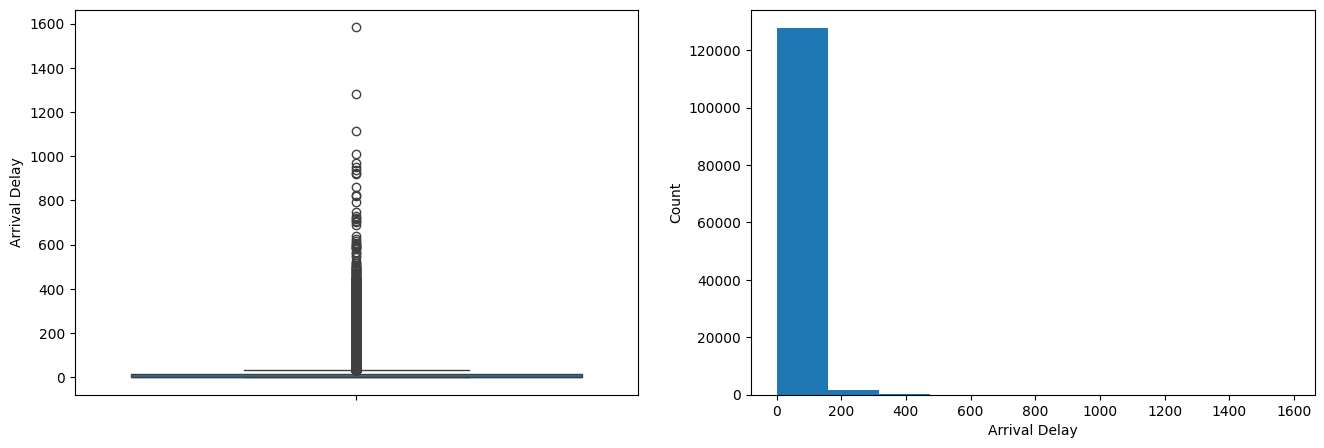

In [ ]:
## only around 400 records are having Null values. This might not affect the entire dataset, so we can try to impute the records with mean/median
plt.figure(figsize=(16, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data['Arrival Delay'])
plt.subplot(1, 2, 2)
plt.hist(data['Arrival Delay'])
plt.xlabel('Arrival Delay')
plt.ylabel('Count')
plt.show()

In [ ]:
## The box plot looks weird with lot of outliers, this is because most of the values are in range of 0-200, with 0 being the mode.
## So we will be replcing the null values with median value.

In [ ]:
data['Arrival Delay'] = data['Arrival Delay'].fillna(data['Arrival Delay'].median())
data['Arrival Delay'].isnull().sum()

np.int64(0)

In [ ]:
## We need to change the data type of filght distance
## There are some incorrect values which might cause an issue during the type casting. We will clean those records using below function.

## The below ignores all the other characters which are not digits and then finally convert the string into float.
import re
def dty(x):
  lst = []
  for i in x:
    if type(i) == str:
      i = ''.join(re.findall("\d", i))
    lst.append(float(i))
  return lst


In [ ]:
data['Flight Distance'] = dty(data['Flight Distance'])
data['Flight Distance'].dtype

dtype('float64')

In [ ]:
data['Departure Delay'] = data['Departure Delay'].astype('float')
data['Departure Delay'].dtype

dtype('float64')

In [ ]:
## Time and distance related features should be continous, hence type casted them to Float.

## Since we are done with cleaning the dataset, we can start analysing it to uncover hidden insights.

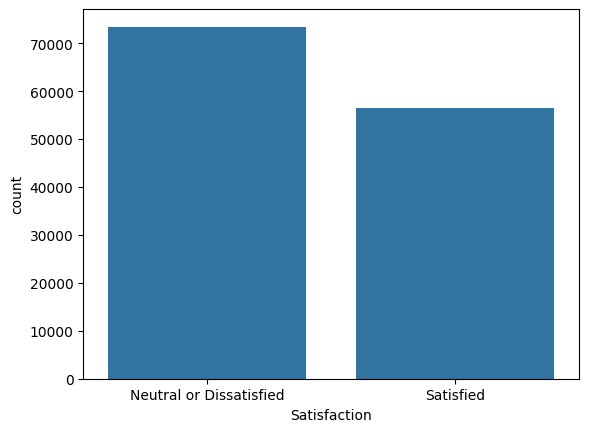

In [ ]:
## Exploratory Data Analysis

## Lets start with Target variable

sns.countplot(x = data['Satisfaction'])
plt.show()

In [ ]:
# There are two classes in the Target variable. Hence this is a Binary classification problem.
# There is not much difference between the two classes. We can say that the data is not Imbalanced.
# But the overall customer experience need to be enhanced.

In [ ]:
rat_cols = ['Departure and Arrival Time Convenience', 'Ease of Online Booking','Check-in Service', 'Online Boarding', 'Gate Location',
       'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness','Food and Drink', 'In-flight Service', 'In-flight Wifi Service',
       'In-flight Entertainment', 'Baggage Handling']

In [ ]:
len(rat_cols)

14

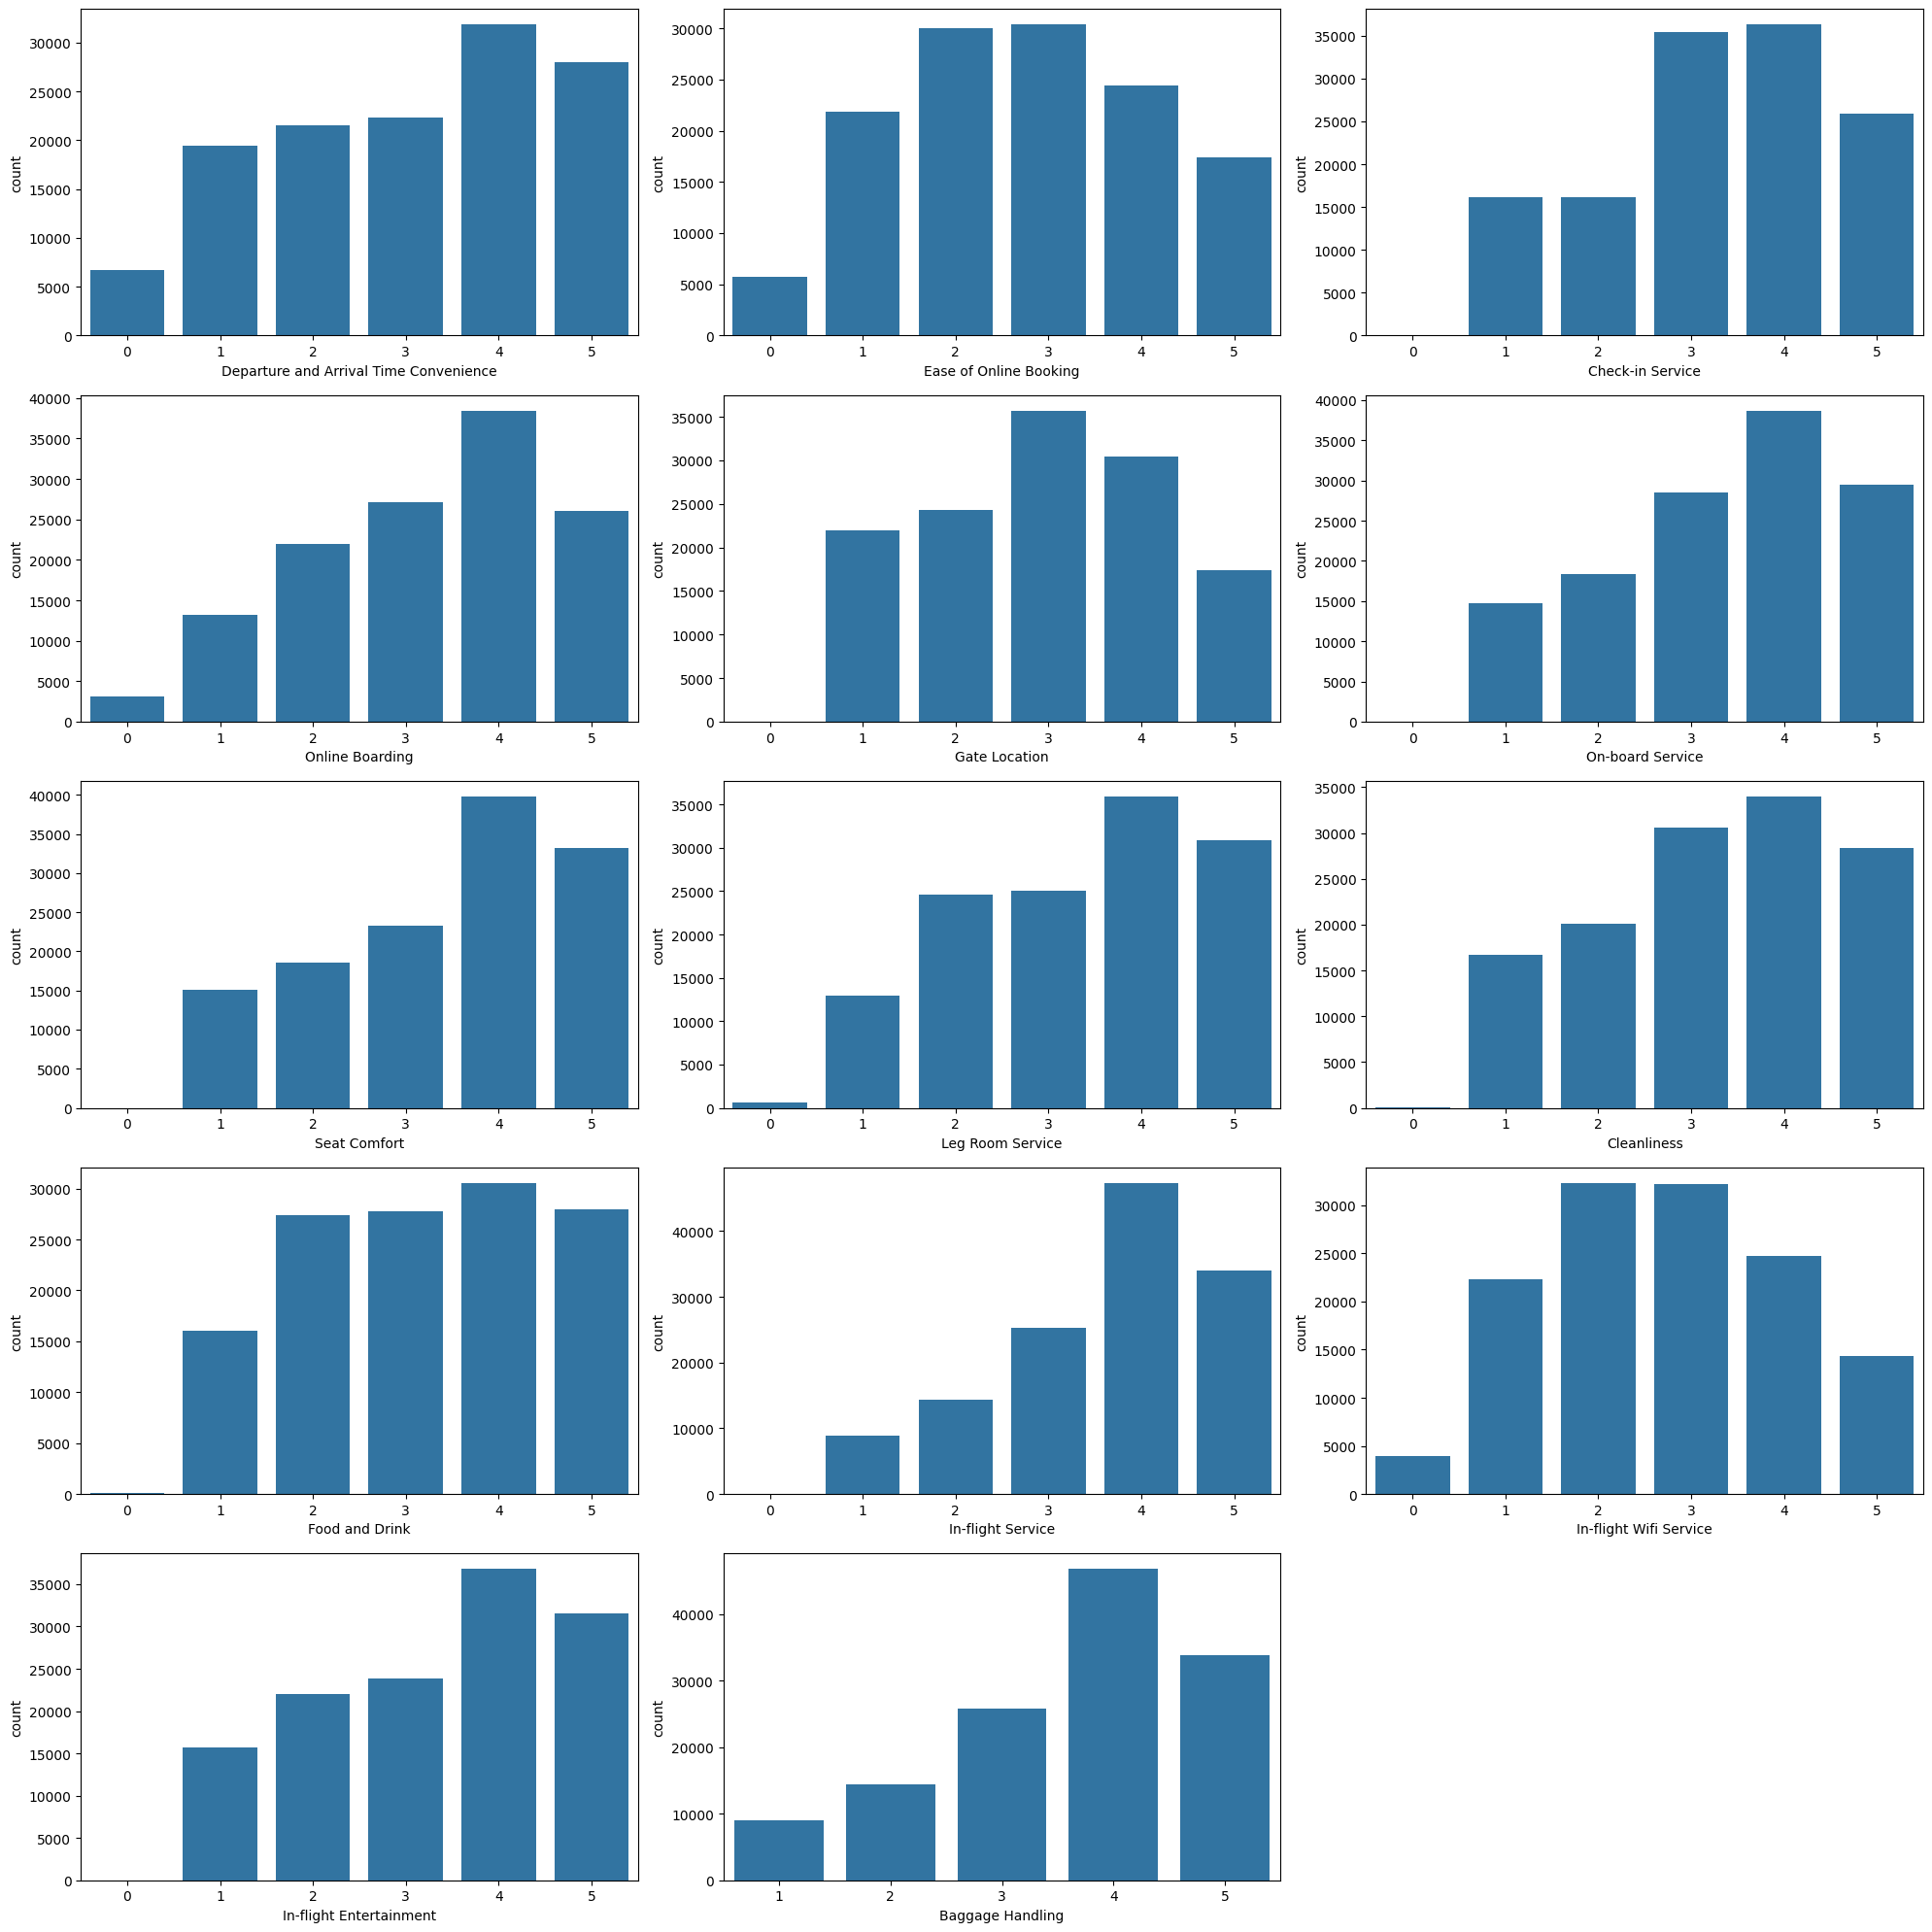

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(5, 3, figsize=(20, 20))
axes = axes.flatten()

for i, col in enumerate(rat_cols):
    sns.countplot(data=data, x=col, ax=axes[i])

# Hide any unused subplots if rat_cols < 15
for j in range(len(rat_cols), 15):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [ ]:
rat_dict = {}
for i in range(len(rat_cols)):
  rat_dict[rat_cols[i]] = data[rat_cols[i]].median()

pd.Series(rat_dict, name='Median Rating')

,Median Rating
Departure and Arrival Time Convenience,3.0
Ease of Online Booking,3.0
Check-in Service,3.0
Online Boarding,3.0
Gate Location,3.0
On-board Service,4.0
Seat Comfort,4.0
Leg Room Service,4.0
Cleanliness,3.0
Food and Drink,3.0


In [ ]:
## Based on the count plots, most of the variables looked like they are skewed to the left. So we took median value to understand the distribution.
## Features like 'On-board service', 'Seat Comfort', 'Leg Room Service', 'In-flight service', 'In-flight Entertainment', 'Baggage Handling' scored better median rating
## One observation is that, most of the In-flight services are good. Improvements/Focus is required on other services.

In [ ]:
cat_cols = ['Gender', 'Customer Type', 'Type of Travel', 'Class']

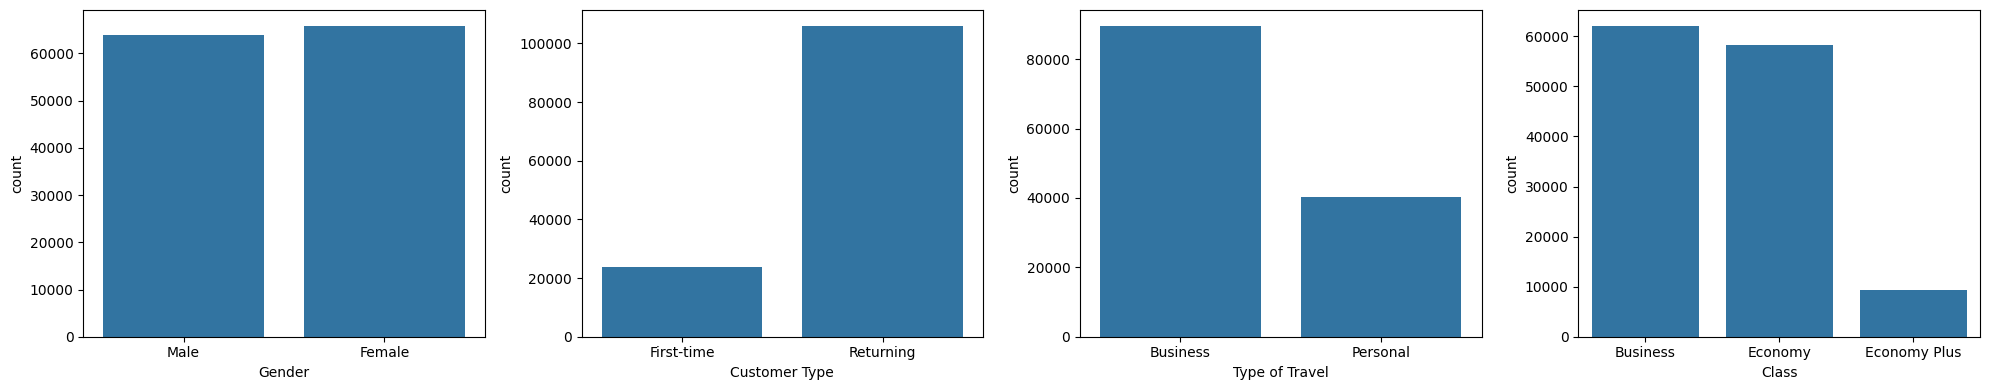

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 4, figsize=(20, 4))
axes = axes.flatten()

for i, col in enumerate(cat_cols):
    sns.countplot(data=data, x=col, ax=axes[i])

# Hide any unused subplots if rat_cols < 15
for j in range(len(rat_cols), 4):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [ ]:
## key observations

# there are equal number of male and female passengers
# Customer retention is higher which is a good sign.
# The customer who are using Airlines for business purpose are higher which is understandable.
# People who are travelling on business purpose are also using Economy class.

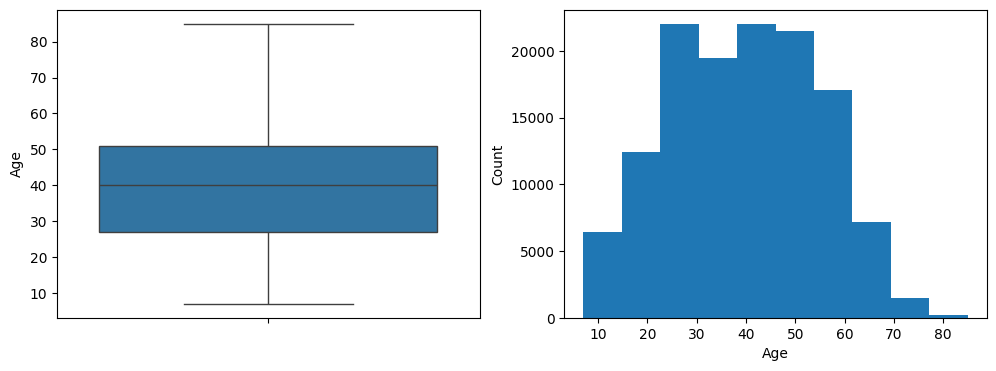

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.boxplot(data['Age'])
plt.subplot(1, 2, 2)
plt.hist(data['Age'])
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [ ]:
## Based on the above plots, the distribution of Age variable is almost normal. And there are no outliers.
# Most of the passengers fall into 25-50 age bucket.

In [ ]:
## Till we have analyzed each variable individually. Lets how these variable affect the Target variable.

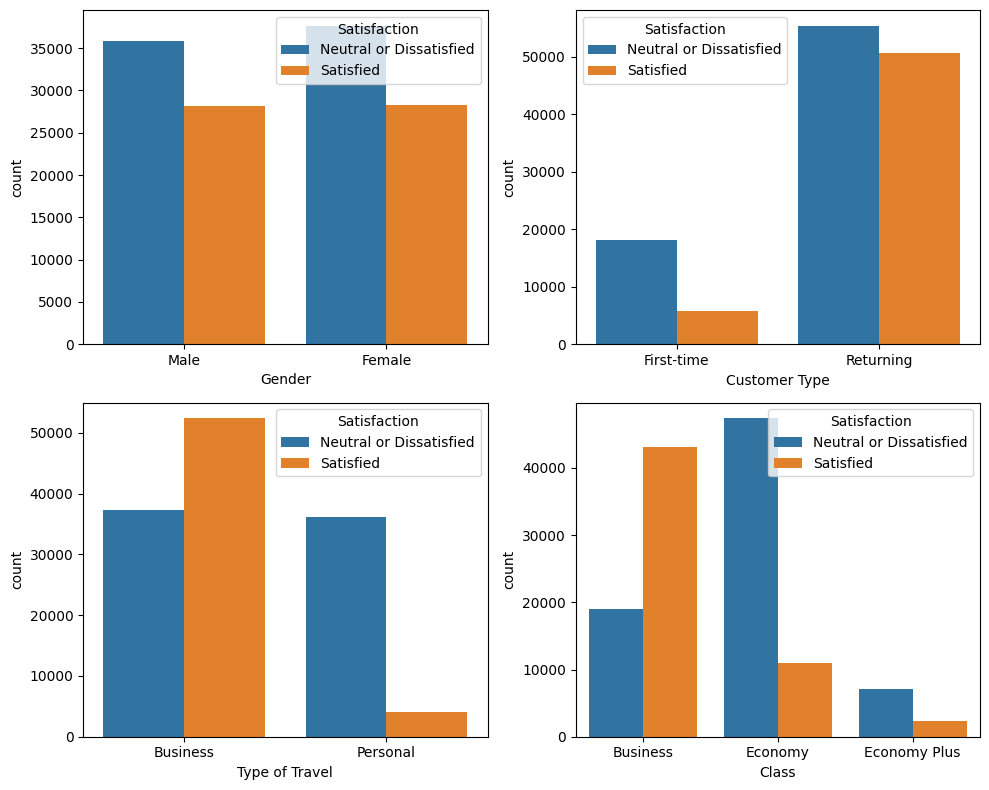

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 2, figsize=(10, 8))
axes = axes.flatten()

for i, col in enumerate(cat_cols):
    sns.countplot(data=data, x=col, hue='Satisfaction', ax=axes[i])

# Hide any unused subplots if rat_cols < 15
for j in range(len(rat_cols), 4):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [ ]:
## Gender has no visible affect on the Target variable
## First time users are not that satisfied with the services. We need to deep digger to find out.
## Business class has higher satisfaction rate than the other two classes which is understandable.

In [ ]:
not_satisfied = data[data['Satisfaction'] == 'Neutral or Dissatisfied']
not_satisfied.head()

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821.0,2.0,5.0,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
8,9,Male,50,Returning,Business,Business,2607.0,0.0,0.0,1,...,4,3,4,3,3,4,4,4,4,Neutral or Dissatisfied
10,11,Female,28,First-time,Business,Business,821.0,0.0,5.0,1,...,2,2,5,2,2,4,1,2,3,Neutral or Dissatisfied
11,12,Female,27,First-time,Business,Business,421.0,20.0,21.0,2,...,2,2,5,1,1,3,1,1,4,Neutral or Dissatisfied
12,13,Male,24,First-time,Business,Economy,453.0,16.0,30.0,2,...,2,5,4,5,5,4,2,5,4,Neutral or Dissatisfied


In [ ]:
not_satisfied.shape

(73452, 24)

In [ ]:
rat_dict = {}
for i in range(len(rat_cols)):
  rat_dict[rat_cols[i]] = not_satisfied[rat_cols[i]].median()

pd.Series(rat_dict, name='Median Rating')

,Median Rating
Departure and Arrival Time Convenience,3.0
Ease of Online Booking,3.0
Check-in Service,3.0
Online Boarding,3.0
Gate Location,3.0
On-board Service,3.0
Seat Comfort,3.0
Leg Room Service,3.0
Cleanliness,3.0
Food and Drink,3.0


In [ ]:
satisfied = data[data['Satisfaction'] != 'Neutral or Dissatisfied']
satisfied.head()

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
1,2,Female,35,Returning,Business,Business,821.0,26.0,39.0,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853.0,0.0,0.0,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905.0,0.0,0.0,2,...,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470.0,0.0,1.0,3,...,3,4,4,5,4,3,3,3,3,Satisfied
5,6,Male,43,Returning,Business,Business,3788.0,0.0,0.0,4,...,4,4,4,3,3,4,4,4,4,Satisfied


In [ ]:
rat_dict = {}
for i in range(len(rat_cols)):
  rat_dict[rat_cols[i]] = satisfied[rat_cols[i]].median()

pd.Series(rat_dict, name='Median Rating')

,Median Rating
Departure and Arrival Time Convenience,3.0
Ease of Online Booking,3.0
Check-in Service,4.0
Online Boarding,4.0
Gate Location,3.0
On-board Service,4.0
Seat Comfort,4.0
Leg Room Service,4.0
Cleanliness,4.0
Food and Drink,4.0


In [ ]:
not_business = data[data['Class'] != 'Business']
not_business.head()

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
12,13,Male,24,First-time,Business,Economy,453.0,16.0,30.0,2,...,2,5,4,5,5,4,2,5,4,Neutral or Dissatisfied
14,15,Male,52,Returning,Personal,Economy,853.0,0.0,0.0,4,...,3,2,3,2,2,5,2,2,5,Neutral or Dissatisfied
15,16,Male,70,Returning,Personal,Economy,821.0,0.0,0.0,5,...,4,5,2,5,5,5,2,5,4,Neutral or Dissatisfied
16,17,Female,48,Returning,Personal,Economy,821.0,0.0,0.0,3,...,5,1,2,2,1,5,2,5,5,Neutral or Dissatisfied
17,18,Female,61,Returning,Personal,Economy,821.0,0.0,0.0,5,...,5,5,2,1,4,5,2,5,5,Neutral or Dissatisfied


In [ ]:
not_business.shape

(67720, 24)

In [ ]:
rat_dict = {}
for i in range(len(rat_cols)):
  rat_dict[rat_cols[i]] = not_business[rat_cols[i]].median()

pd.Series(rat_dict, name='Median Rating')

,Median Rating
Departure and Arrival Time Convenience,4.0
Ease of Online Booking,3.0
Check-in Service,3.0
Online Boarding,3.0
Gate Location,3.0
On-board Service,3.0
Seat Comfort,3.0
Leg Room Service,3.0
Cleanliness,3.0
Food and Drink,3.0


In [ ]:
cont_cols = ['Age', 'Flight Distance', 'Departure Delay', 'Arrival Delay']

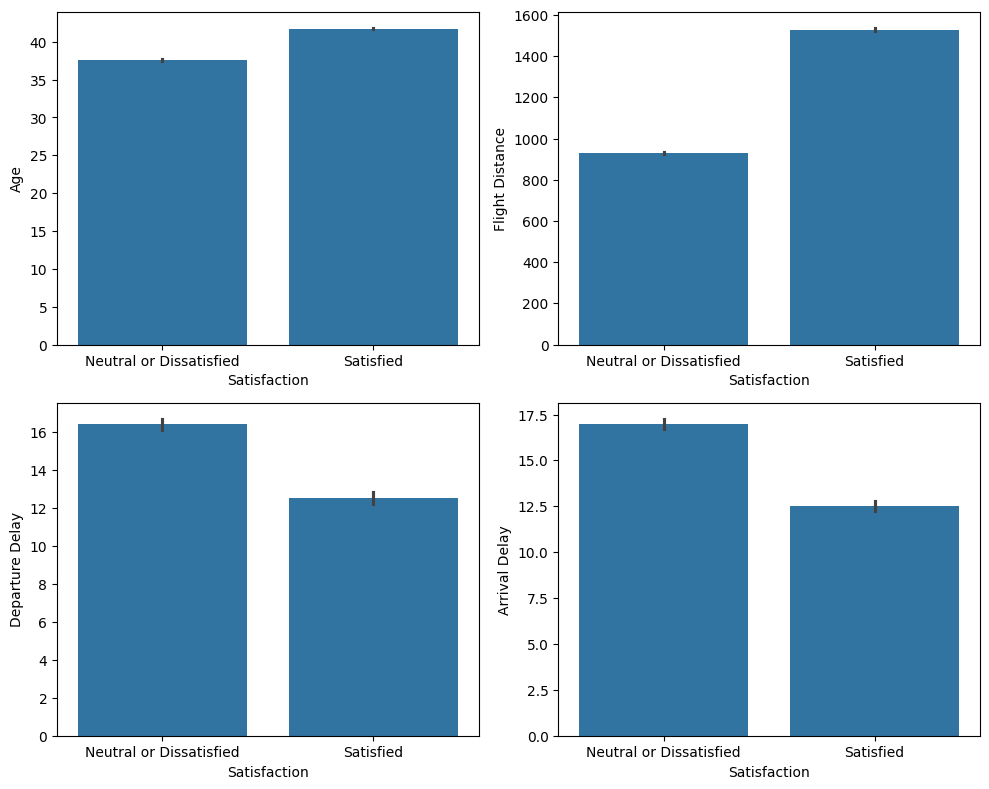

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 2, figsize=(10, 8))
axes = axes.flatten()

for i, col in enumerate(cont_cols):
    sns.barplot(data=data, x='Satisfaction', y = col, ax=axes[i])

# Hide any unused subplots if rat_cols < 15
for j in range(len(rat_cols), 4):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [ ]:
## So far from our analysis:

## Passenger Age and Gender does not have any significant visual impact on the overall satisfaction
## Longer delays lead to passenger dissatisfaction.
## People who are traveling shorter distances express more concern than the others. This may due to shorter distances,
## they might have chosen Economy class, where services are not that great.

## Arrival and departure convinience, Ease of online booking, Gate Location, Inflight-wifiservice are the common services with
## lower rating among different classes of passengers and circumstances.

In [ ]:
## Converting categorical variables to numerical

In [ ]:
data['Gender'] = data['Gender'].map({'Female': 0, 'Male': 1})
data['Customer Type'] = data['Customer Type'].map({'First-time': 0, 'Returning': 1})
data['Type of Travel'] = data['Type of Travel'].map({'Personal': 0, 'Business': 1})
data['Class'] = data['Class'].map({'Economy': 0, 'Economy Plus':1, 'Business': 2})
data['Satisfaction'] = data['Satisfaction'].map({'Neutral or Dissatisfied': 0, 'Satisfied': 1})

In [ ]:
data.head()

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,1,48,0,1,2,821.0,2.0,5.0,3,...,3,5,2,5,5,5,3,5,5,0
1,2,0,35,1,1,2,821.0,26.0,39.0,2,...,5,4,5,5,3,5,2,5,5,1
2,3,1,41,1,1,2,853.0,0.0,0.0,4,...,3,5,3,5,5,3,4,3,3,1
3,4,1,50,1,1,2,1905.0,0.0,0.0,2,...,5,5,5,4,4,5,2,5,5,1
4,5,0,49,1,1,2,3470.0,0.0,1.0,3,...,3,4,4,5,4,3,3,3,3,1


In [ ]:
data[cat_cols].shape, len(data['Satisfaction'])

((129880, 4), 129880)

In [ ]:
data[cat_cols+rat_cols]

,Gender,Customer Type,Type of Travel,Class,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling
0,1,0,1,2,3,3,4,3,3,3,5,2,5,5,5,3,5,5
1,0,1,1,2,2,2,3,5,2,5,4,5,5,3,5,2,5,5
2,1,1,1,2,4,4,4,5,4,3,5,3,5,5,3,4,3,3
3,1,1,1,2,2,2,3,4,2,5,5,5,4,4,5,2,5,5
4,0,1,1,2,3,3,3,5,3,3,4,4,5,4,3,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,1,1,0,1,4,4,4,4,2,5,1,4,4,4,5,4,4,4
129876,1,1,0,1,5,3,5,3,4,5,2,5,2,2,4,3,2,5
129877,1,1,0,1,5,2,4,2,1,3,3,4,3,3,4,2,3,5
129878,1,1,0,1,4,4,3,4,1,4,4,5,3,3,4,5,3,5


In [ ]:
## Feature selection
from sklearn.feature_selection import chi2
from scipy.stats import f_oneway


chi_scores, p_values_cat = chi2(data[cat_cols+rat_cols], data['Satisfaction'])

chi_results = pd.DataFrame({
    'Feature': cat_cols+rat_cols,
    'Chi2 Score': chi_scores,
    'p-value': p_values_cat
})

In [ ]:
print("🔷 Chi-Square Test (Categorical Features):")
print(chi_results[chi_results['p-value']<0.05])

🔷 Chi-Square Test (Categorical Features):
                                   Feature    Chi2 Score        p-value
0                                   Gender      8.319769   3.921591e-03
1                            Customer Type    822.844959  5.824281e-181
2                           Type of Travel   8132.850091   0.000000e+00
3                                    Class  28403.596386   0.000000e+00
4   Departure and Arrival Time Convenience    291.611324   2.215474e-65
5                   Ease of Online Booking   2639.965094   0.000000e+00
6                         Check-in Service   3545.003037   0.000000e+00
7                          Online Boarding  18340.344018   0.000000e+00
9                         On-board Service   6602.710135   0.000000e+00
10                            Seat Comfort   7993.086356   0.000000e+00
11                        Leg Room Service   6554.605643   0.000000e+00
12                             Cleanliness   6429.597796   0.000000e+00
13                    

In [ ]:
data[cont_cols]

,Age,Flight Distance,Departure Delay,Arrival Delay
0,48,821.0,2.0,5.0
1,35,821.0,26.0,39.0
2,41,853.0,0.0,0.0
3,50,1905.0,0.0,0.0
4,49,3470.0,0.0,1.0
...,...,...,...,...
129875,28,447.0,2.0,3.0
129876,41,308.0,0.0,0.0
129877,42,337.0,6.0,14.0
129878,50,337.0,31.0,22.0


In [ ]:
anova_results = []
for col in cont_cols:
    group0 = data[data['Satisfaction'] == 0][col]
    group1 = data[data['Satisfaction'] == 1][col]
    f_stat, p_val = f_oneway(group0, group1)
    anova_results.append((col, f_stat, p_val))

anova_df = pd.DataFrame(anova_results, columns=['Feature', 'F-Statistic', 'p-value'])

In [ ]:
anova_df[anova_df['p-value']<0.05]

,Feature,F-Statistic,p-value
0,Age,2378.024191,0.000000e+00
1,Flight Distance,12665.660936,0.000000e+00
2,Departure Delay,335.238409,8.634339e-75
3,Arrival Delay,440.585459,1.174006e-97


In [ ]:
## As per the test results, all the features have p-value < 0.05. This shows all the columns play significant role in predicting the output variable.

In [ ]:
## splitting the data train and test, independent and dependent variables

In [ ]:
y = data['Satisfaction']
x = data.drop('Satisfaction', axis = 1)

In [ ]:
x.shape, len(y)

((129880, 23), 129880)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state = 42)

In [ ]:
x_train.shape, len(y_train)

((116892, 23), 116892)

In [ ]:
## Model building

## The dataset has 23 columns and over 100000 records. The dataset has some outliers. Considering all these factors,
## simple algos like Lin Reg, KNN, SVM, might struggle to capture the data patterns.
## Hence we will be trying Ensemble methods like Random Forest and Xgboost.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, precision_score
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
params = {
    'XGBClassifier' : {'model': XGBClassifier(), 'params':{'n_estimators': [10, 50, 100], 'max_depth':[3, 5]}},
    'RandomForestClassifier': {'model':RandomForestClassifier(), 'params':{'n_estimators': [10, 50, 100],'max_depth': [3, 5]}}
}

In [ ]:
gcv = []
for i in params:
  res = RandomizedSearchCV(params[i]['model'], params[i]['params'], scoring='accuracy').fit(x_train, y_train)
  gcv.append({'model':i, 'best params':res.best_params_, 'best score':res.best_score_})

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


In [ ]:
gcv_df = pd.DataFrame(gcv)
gcv_df

,model,best params,best score
0,XGBClassifier,"{'n_estimators': 100, 'max_depth': 5}",0.963941
1,RandomForestClassifier,"{'n_estimators': 100, 'max_depth': 5}",0.922561


In [ ]:
## As per the above results, we can see that XGBClassifier is the best model.

In [ ]:
xgb = XGBClassifier(max_depth=5, n_estimators=100)
xgb.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
preds = xgb.predict(x_test)

In [ ]:
print(accuracy_score(y_test, preds))

0.9646596858638743


In [ ]:
cm = confusion_matrix(y_test, preds, labels=xgb.classes_)

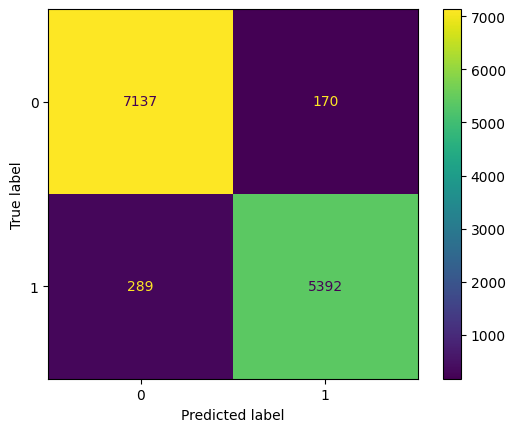

In [ ]:
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=xgb.classes_).plot()

In [ ]:
print(precision_score(y_test, preds))

0.9694354548723481


In [ ]:
## The overall results are looking good. We are able to generate prediction with 97% Presicion.